# Modèle élémentaire : La régression linéaire
La régression linéaire est l’un des outils les plus basiques en Machine Learning. Cela consiste à faire correspondre au mieux un modèle mathématique à un jeu de données. Plus formellement, on dit que l’on détermine le lien entre une variable ‘explicative’ (des variables dans le cas de la régression multiple) et une variable ‘expliquée’.

Pour cela, il faut tout d'abord des données à modéliser. Pour illustrer cela, supposons que vous êtes agent immobilier et que vous avez répertorié un grand jeu de données concernant des appartements. Pour chaque appartement, vous avez sa surface, son prix, son niveau d'isolation ...
L'objectif est d'en extraire un modèle mathématique suffisament fiable pour que vous puissiez déterminer le prix d'un appartement lorsque vous le visitez à partir de ses caractéristiques.
Il vous faut maintenant sélectionner un modèle mathématique qui consiste en une courbe dont vous pouvez modifier les paramètres pour l'ajuster à vos données. Cela peut être une droite, un polynôme, une exponentielle ...

Ce modèle va permettre de faire le lien entre les caractéristiques et le prix de l'appartement. On parle de régression simple lorsque le prix n'est lié qu'à une seule variable explicative, par exemple la surface. Mais vous imaginez bien qu'à surface égale, un appartement situé proche du centre ville et des services sera plus cher qu'un bien situé en périphérie. Dans ce cas là, il faut déterminer le prix en fonction de plusieurs variables explcatives. On parle alors de régression multiple. C'est une technique assez courante puisque vous serez souvent confrontés à des phénomènes dont les paramètres sont liés entre eux. 

Une fois que vous avez déterminé votre modèle et chargé vos données, il n'y a plus qu'à optimiser ses paramètres. 

Dans la suite de ce chapitre, nous ne traiterons que le cas de la régression simple pour une droite affine et un polynôme, mais si vous avez bien compris le principe, avec quelques recherches et un peu de réflexion, vous devriez pouvoir adapter l'algorithme à votre modèle.


Pour mieux comprendre cela, étudions un exemple simple.

Prenons un jeu de données qui contient le prix ainsi que la surface d’un certain nombre d’appartements. 
Voici le graphique obtenu lorsque l’on trace le prix d’un appartement en fonction de sa surface. Un point correspond à un appartement, son abscisse correspond à sa surface, son ordonnée à son prix.

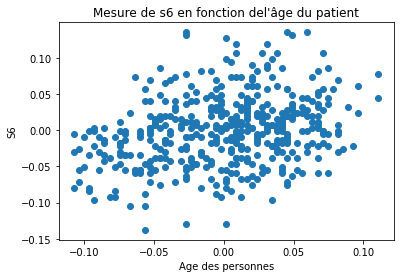

Observons un peu ce nuage de point. On peut remarquer que plus la surface est grande, plus le prix des appartements est élevé.

Imaginons que nous voulions déterminer le prix d’un appartement en fonction de sa surface.  Nous disposons de données discrètes (nombre fini d’exemples), ce qui ne permet pas de déterminer le prix d’un appartement quelle que soit sa surface. Il nous faut donc disposer d’un modèle mathématique continu.

C’est ici qu’intervient la régression linéaire : Nous allons expliquer la variable ‘prix’ à partir de la variable ‘surface’ . Il n’y a qu’une variable explicative, la régression sera donc qualifiée de simple par opposition à la régression multiple.

## La régression c’est sympa, mais comment on fait ?

L’idée de la régression, c’est de **quantifier l’écart** entre le modèle et les données, puis de **minimiser cet écart** en faisant varier les paramètres du modèle.

Reprenons nos données, nous avons relevé que les points formaient une droite, nous allons donc choisir un modèle de droite affine pour les représenter. Le modèle aura donc une équation de la forme `y = ax+b`, où `y` est le prix prédit à partir d’une surface `x`.  `a` et  `b` sont les paramètres que l’on fera varier pour **ajuster le modèle**.

Maintenant, il faut être capable de quantifier l’écart entre le modèle et les données. C’est à ça que sert la **fonction coût**. Nous utiliserons ici la **moyenne quadratique des écarts (Mean Squared Error en anglais ou MSE)**  : 
> $S(y,ŷ) = \frac{1}{2m} * \sum_{i=0}^m (ŷ_i - y_i)²$
><br>
Explication : On mesure ici l'erreur entre le modèle et les données >expérimentales en calculant la somme des écarts au carré entre les données expérimentales et les valeurs prédites par le modèle.

On note $y_i$ la i-ème valeur expérimentale de la variable expliquée,  $ŷ_i$ est la i-ème valeur prédite par le modèle et m correspond au nombre de données dans le jeu.


⚠ Il est important de noter que ***`ce n’est pas la seule fonction coût qui puisse exister et qu’il existe plusieurs techniques pour réaliser une régression`***. Nous ne traiterons ici que de la méthode la plus courante dite des moindres carrés avec optimisation par une descente de gradient.

Nous avons donc à présent un modèle, des données et une fonction qui quantifie les écarts entre les deux.
Nous allons maintenant nous attaquer à l’optimisation des paramètres !


### Optimisation des paramètres :
*Encore une fois, il existe plusieurs manières de calculer les paramètres optimaux d'une régression linéaire et il serait difficile de toutes les lister. Nous allons donc traiter ici de la technique la plus commune*

Le but de l'optimisation est de modifier les paramètres du modèle pour minimiser l'erreur. Nous allons pour cela utiliser l'outil gradient.

Pour rappel on appel le gradient d'une fonction à n variables est l'application qui associe à f un vecteur dont les composantes sont les dérivées partielles par rapport à chacune des variables de f :
<br><br>
$
\nabla f(\left.x_{1}, x_{2}, \ldots, x_{n}\right)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial x_1} \\
\dfrac{\partial f}{\partial x_2} \\
\vdots \\
\dfrac{\partial f}{\partial x_n}
\end{array}\right]
$

<br>

Calculer le gradient de notre fonction coût va nous renseigner sur ses variations et fournira des des informations sur la manière dont on doit faire varier les paramètres pour minimiser l'erreur.



### Calcul du gradient :
Dans cette section, nous allons calculer ensemble le gradient de la fonction coût. Si vous êtes adepte des maths, et que vous voulez une démonstration pas à pas, je vous invite à aller voir la [vidéo de MachinLearnIA](https://www.youtube.com/watch?v=wg7-roETbbM) qui sert de base à ce chapitre.


Rappelons ce qui a été établi plus haut:
- Le modèle $ŷ_i = a \times x_i + b$
- La fonction coût $S(y,ŷ) = \frac{1}{2m} * \sum_{i=0}^m (ŷ_i - y_i)²$


Calculons les dérivées partielles de S par rapport aux paramètres a et b: <br>
$\frac{\partial S}{\partial a} = \sum_{i=0}^m x_i \times (ŷ_i - y_i)$ <br>
$\frac{\partial S}{\partial b} = \sum_{i=0}^m (ŷ_i - y_i)$

On peut remarquer qu'en posant :

$X = \left[\begin{array}{c}{x_1\\
\vdots\\x_m} {1 \\ \vdots \\ 1}\end{array} \right]$

$Y =  \left[\begin{array}{c}
{y_1\\ \vdots \\ y_m}\end{array}\right]$

$\Theta =  \left[\begin{array}{c}
{a \\ b}\end{array}\right]$

On a alors :
$∇S = \frac{1}{m} \times ^tX \times (X\Theta - Y)$




### Stratégie d'optimisation :
Pour optimiser le modèle, l'idée est de réaliser un certain nombre d'itérations au cours desquelles nous allons modifier légèrement les paramètres a et b. Pour cela, à chaque itération, on calcule la nouvelle valeur de $\Theta$ de la manière suivante :
$\Theta ' = \Theta - \alpha \times ∇S$

On pourrait avoir envie de retrancher simplement le gradient au vecteur $\Theta$ mais dans certains cas, si la variation de S est trop importante, on pourrait se retrouver dans l'impossibilité de converger :

-- Insérer animations explicatives sur gradient trop grand -- 

Pour résoudre ce problème, nous allons ajouter l'**hyperparamètre** $\alpha$ à notre modèle. On l'appelle le `learning rate` et c'est un simple coefficient qui permet de pondérer le gradient lors du calcul de $\Theta$ pour limiter la valeur du gradient. Nous ne traiterons pas plus de cet hyperparmamètre ici, cela sera traité dans le prochain chapitre.

## Synthèse des calculs :
- On a choisi un modèle de droite affine :  $ŷ_i= a x_i+ b$
- On a choisi d’utiliser la fonction coût MSE qui s’écrit donc : $S(y,ŷ) = \frac{1}{2m} * \sum_{i=0}^m (ŷ_i - y_i)²$

- On utilise l’algorithme de descente de gradient pour optimiser les paramètres avec cette formule : $\Theta ' = \Theta - \alpha \times ∇S$ 


Pour pouvoir calculer tout cela il nous faut définir 3 matrices : 
* X  : Une matrice qui contient les **données explicatives** (m données discrètes)
* Y  : Une matrice qui contient les** données expliquées** tirées du dataset (m données discrètes). Ces données serviront à calibrer le modèle
* $\Theta$ : La matrice qui contient les **paramètres du modèle**. Les paramètres pourront être initialisés aléatoirement ou arbitrairement (exemple : a = 0 et b = 0)



## Algorithme :
Voici donc l’algorithme que je vous propose d’utiliser pour réaliser une régression linéaire simple :

> Début

>Importer/charger les données à traiter

>Initialiser les 3 matrices X, Y, et $\Theta$

>Définir la fonction gradient

>Faire n fois : <br>
        &emsp;Retrancher à $\Theta$ le produit du learning rate, de X et de $\Theta$

> Fin

A ce stade, les paramètres ont été optimisés, ils peuvent être utilisés pour définir le modèle de droite affine qui servira à modéliser les données.



#Implémentation de l'algorithme de régression linéaire sous python :

In [46]:
# Imports
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import numpy as np

## Le dataset :
J'ai choisi d'utiliser un dataset qui est intégré dans la librairie Sklearn. L'objectif ici n'est pas d'apprendre à utiliser cette librairie, mais sachez tout de même qu'il s'agit d'une librairie python qui regroupe un très grand nombre de modèles de machine learning et quelques dataset.
Le jeu de données choisi regroupe des données médicales de 420 personnes. Nous ne nous attarderons pas sur le contenu du jeu pour nous focaliser sur la mise en application d'une régression linéaire simple.

In [47]:
# Chargement du dataset
data, targets = load_diabetes(return_X_y=True, as_frame=True)
data.describe() # Résumé des données



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


### Notre objet d'étude :
Je vous propose de travailler sur le lien entre l'age de la personne et sa mesure s6. On sélectionne donc les 2 colonnes du dataframe importé [--insérer lien vers indexage avec panda--]
On commence par tracer les points de données avec l'âge en abscisses et la mesure s6 en ordonnées.
On obtient le nuage de points suivant

(442,) (442,)


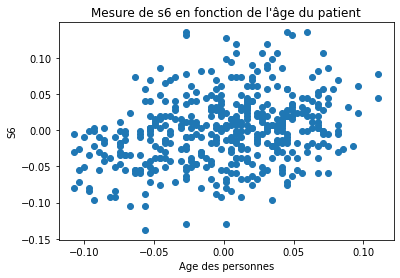

In [48]:
# Sélection des 2 colonnes de données
age, s6= data["age"], data["s6"]
print(age.shape, s6.shape)
# Tracé du nuage de point
plt.scatter(age, s6)
plt.xlabel("Age des personnes")
plt.ylabel("S6")
plt.title("Mesure de s6 en fonction de l'âge du patient")
plt.show()

### Analyse rapide des données :
On remarque qu'il se dégage une tendance dans ce nuage de ponts. Ils semblent s'aligner autour d'une droite de pente proche de 0.5 :
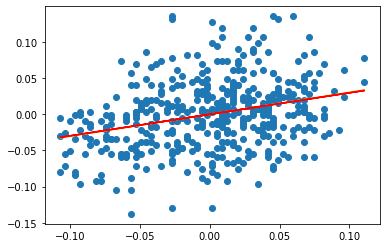



Nous allons mettre en oeuvre un régression linéaire qui nous le confirmera.

In [49]:
# Définition des matrices X, Y et Theta
X = np.stack((age, np.ones(age.shape)), axis=-1) # Ajout d'une colonne de biais aux données
Y = np.array(s6).reshape(s6.shape[0], 1)
Theta = np.random.randn(2, 1)
Theta_init = Theta.copy() # On copie les paramètres initiaux pour comparer ensuite les modèles optimisé et initial

print("X shape : ", X.shape, "  Y shape : ", Y.shape, "Theta shape : ", Theta.shape) # Vérification des tailles de chaque matrice

X shape :  (442, 2)   Y shape :  (442, 1) Theta shape :  (2, 1)


# Définition des fonctions

In [50]:
# Implémenter le calcul  et de son gradient
def grad(X, Y, Theta):
  m = len(Y)
  return  1/m * X.T.dot(X.dot(Theta) - Y)

def cost_function(X, Y, Theta):
  m = len(Y)
  return 1/(2*m) * np.sum((X.dot(Theta) - Y)**2)

# Optimisation des paramètres

In [61]:
n = 1000 # Nombre d'itérations de l'optimisation
lr = 0.01 # Learning rate : Pour régler la vitesse de convergence

history = [] # Cet historique permettra de tracer l'évolution de l'erreur du modèle au cours des itérations

# Apprentissage
for i in range(n):
  Theta -= grad(X, Y, Theta) # Mise à jour des paramètres
  history.append(cost_function(X, Y, Theta)) # Enregistrement des paramètres dans l'historique

param_opti = Theta.copy() # On stocke les paramètres optimisés dans une variable
Y_prediction = X.dot(Theta) # On calcul les points de la droite

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  


# Analyse des résultats :
On vient d'entraîner notre modèle, voyons ce que nous obtenons. On va commencer par afficher l'évolution de l'erreur au cours de l'entraînement, puis nous afficherons les courbes obtenues ainsi que les paramètres calculés.

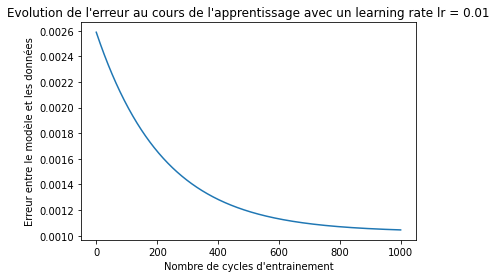

In [52]:
plt.plot(range(len(history)), history)
plt.xlabel("Nombre de cycles d'entrainement")
plt.ylabel("Erreur entre le modèle et les données")
plt.title(f"Evolution de l'erreur au cours de l'apprentissage avec un learning rate lr = {lr}")
plt.show()

On voit que l'erreur converge bien vers un minimum. On peut jouer sur la valeur de $\alpha$ pour ajuster la vitesse de convergence. Il faut cependant faire attention à ne pas utiliser de valeurs trop grandes qui empêcheraient la convergence !

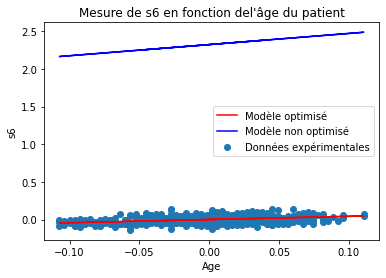


########### Paramètres ###########
Paramètres initiaux : 
 [[1.47894938]
 [2.32231497]]
Paramètres optimisés : 
 [[ 4.23960821e-01]
 [-1.85874443e-16]]


In [53]:
# Tracé des données
plt.plot(age,  Y_prediction, "r")
plt.plot(age,  X.dot(Theta_init), "b")
plt.scatter(age,  Y)
# Paramétrage du graphe
plt.title("Mesure de s6 en fonction del'âge du patient")
plt.xlabel("Age")
plt.ylabel("s6")
plt.legend(["Modèle optimisé", "Modèle non optimisé", "Données expérimentales"])
plt.show()
print("\n########### Paramètres ###########")
print("Paramètres initiaux : \n", Theta_init)
print("Paramètres optimisés : \n", param_opti)

On voit bien ici que le modèle initial est totalement à côté de la plaque, mais c'est normal, car à ce stade les paramètres ont été définis aléatoirement. Cependant on remarque qu'après optimisation, le modèle est plutôt fidèle à la réalité et suit bien le nuage de points.

Notez que le nuage semble étiré par rapport aux graphes précédents, cela est du au changement d'échelle : les données ne descendent pas au dessous de -0.2 alors que le modèle initial a une ordonnées à l'origine de -0.8. Pour afficher tous les tracés sur la même figure matplotlib bibliothèque de tracés de graphes) a changé l'échelle.

# Régression polynomiale :
Nous venons de voir comment réaliser une régression dans le cas où la variable expliquée dépend d'une variable et que la relation qui les relie est linéaire. Cependant, il se peut très bien que vous tombiez sur des cas où la relation est de forme polynomiale ou exponentielle. 

Nous ne traiterons pas ici de la régression exponentielle, mais il est assez simple d'aapter notre programme précédent pour en faire un algorithme de régression polynomiale simple.

Dans le cas d'une régression polynomiale en effet, le modèle n'est plus $y = a\times x + b$ mais $y = a_0 + a_1 x + a_2 x² + ... + a_n x^n$.

Rappelez-vous, nous avions calculé Y, la matrice qui contenait les valeurs calculées par le modèle à partir de nos données de la manière suivante :

$Y = \left[\begin{array}{c}{x_1\\ \vdots\\x_m} {1 \\ \vdots \\ 1}\end{array} \right]
\times \left[\begin{array}{c}
{a \\ b}\end{array}\right] = \left[\begin{array}{c}{a x_1 + b\\ \vdots\\a x_m + b}\end{array} \right]$

Pour une régression polynomiale de degré n, nous cherchons à obtenir la matrice suivante :

$\left[\begin{array}{c}{a_0 + a_1 x_1 + a_2 x_1² + ... + a_n x_1^n\\ \vdots \\a_0 + a_1 x_m + a_2 x_m² + ... + a_n x_m^n}\end{array} \right]$

Matrice qui s'obtient ainsi :

$Y = \left[\begin{array}{c}{x_1^n\\ \vdots\\x_m^n} {...  \\  \vdots \\ ...}{x_1\\ \vdots\\x_m} {1 \\ \vdots \\ 1} \end{array} \right] \times \left[ \begin{array}{c}{a_1 \\ \vdots \\ a_m} \end{array} \right]$


On peut alors remarquer que les calculs matriciels seront identiques ($Y = X \times \Theta$) et qu'il suffit seulement de modifier les matrices de départ en fonction du degré du polynôme qui sert de modèle.

## Adaptation du programme python :
Pour adapter le programme python, il suffit donc simplement d'adapter les tableaux de données que l'on prend en entrée de l'algorithme.

Pour rappel, nous avions chargé le dataset sur le diabète depuis sklearn. Puis nous avions sélectionné les données qui nous intéressaient. Pour finir, nous avions ajouté la colonne de biais aux données explicatives (la colonne de 1 dans la matrice), et nous avions retravaillé la dimension de Y pour obtenir une matrice de la forme ($m \times 1$).


je vous propose donc de construire une fonction python qui prend en entrée deux listes, l'une contenant les targets et l'autre  les features, ainsi qu'un paramètre *d* qui correspondra au degré du modèle (1 pour une droite, 2 pour un polynôme de degré 2 ...).

In [56]:
def build_arrays(x, y, d):
  """ Permet de construire le tableau de données à fournir à notre modèle pour 
  l'entraîner.
  Paramètres :
    x (ndarray) : tableau de données explicatives (dimensions (m,) ou (m,1))
    y (bdarray) : tableau de données expliquées (dimensions (m,) ou (m,1))
    d (int) : Degré de la régression que l'on souhaite réaliser (1 pour une droite, 2 pour un polynôme du second degré ...)
  Retourne :
    X (ndarray) : le tableau prêt à être passé à l'algorithme d'entraînement
    Y (ndarray) : Idem pour les données expliquées"""

  x = x.reshape(x.shape[0], 1)
  y = y.reshape(y.shape[0], 1)
  params = np.random.randn(d+1, 1) # Initialisation du tableau contenant les paramètres
  X = x**d # Initialiser la première colonne
  for i in range(d-1, -1, -1):
    #print(f"--------------- d = {i} ---------------")
    #print("X : \n", X, "\n : x**i : \n", x**i)
    X = np.hstack((X, x**i)) # Ajout d'une nouvelle colonne à droite
  return X, y, params

# Démonstration pour un tableau simple :
x = np.array([2,2,2,2,2])
y = np.array([1,1,1,1,1])
d = 5

X, Y, Theta = build_arrays(x,y,5) 

print(f"Avant modification : \n --> x : \n{x}\n --> y : \n{y}")
print(f"Après modification : \n --> X : \n{X}\n --> Y : \n{Y}")
print("Paramètres initiaux : ", Theta)

Avant modification : 
 --> x : 
[2 2 2 2 2]
 --> y : 
[1 1 1 1 1]
Après modification : 
 --> X : 
[[32 16  8  4  2  1]
 [32 16  8  4  2  1]
 [32 16  8  4  2  1]
 [32 16  8  4  2  1]
 [32 16  8  4  2  1]]
 --> Y : 
[[1]
 [1]
 [1]
 [1]
 [1]]
Paramètres initiaux :  [[ 0.12752593]
 [ 1.62460394]
 [ 0.31968355]
 [ 0.3320153 ]
 [-1.37692674]
 [ 0.2287687 ]]


In [78]:
n = 100 # Nombre d'itérations de l'optimisation
lr = 1 # Learning rate : Pour régler la vitesse de convergence

history = [] # Cet historique permettra de tracer l'évolution de l'erreur du modèle au cours des itérations

# Générons des données qui ne forment pas une droite
m = 100
x = np.linspace(0, 10, m).reshape(m, 1)
y =  x**5 + x**4 + x**3 + x**2 + x + 0.1 * np.random.randn(m, 1)

X, Y, Theta = build_arrays(x, y, 5)

# Apprentissage
for i in range(n):
  Theta -= grad(X, Y, Theta) # Mise à jour des paramètres
  history.append(cost_function(X, Y, Theta)) # Enregistrement des paramètres dans l'historique
  print(history[i])
param_opti = Theta.copy() # On stocke les paramètres optimisés dans une variable
Y_prediction = X.dot(Theta) # On calcul les points de la droite

5.101224934651856e+26
4.724587758741584e+44
4.375758719941214e+62
4.0526846685649316e+80
3.7534640445261803e+98
3.476335685041002e+116
3.2196684587170557e+134
2.9819516649857685e+152
2.761786142370265e+170
2.557876033253823e+188
2.3690211566776508e+206
2.194109944275552e+224
2.0321128977675561e+242
1.8820765295044133e+260
1.7431177503980164e+278
1.6144186722060264e+296
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  


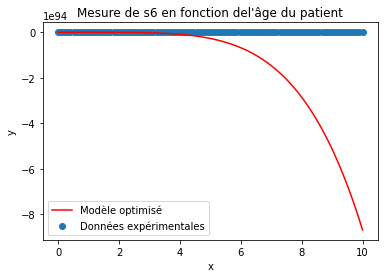


########### Paramètres ###########
Paramètres initiaux : 
 [[1.47894938]
 [2.32231497]]
Paramètres optimisés : 
 [[-8.59832521e+89]
 [-9.41257755e+88]
 [-1.04082522e+88]
 [-1.16535323e+87]
 [-1.32556771e+86]
 [-1.53937221e+85]]


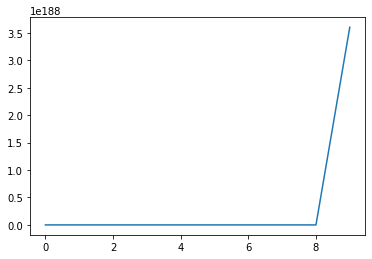

In [74]:
# Tracé des données
plt.plot(x,  Y_prediction, "r")
plt.scatter(x,  y)
# Paramétrage du graphe
plt.title("Mesure de s6 en fonction del'âge du patient")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Modèle optimisé", "Données expérimentales"])
plt.show()
print("\n########### Paramètres ###########")
print("Paramètres initiaux : \n", Theta_init)
print("Paramètres optimisés : \n", param_opti)

plt.plot(history)
plt.show()

## Petit point sur la classification binaire :
Les problèmes qui consistent à séparer différents éléments d’un dataset en plusieurs classes s'appellent des problèmes de classification. Lorsqu’il n’existe que 2 classes dans le problème, on parle alors de classification binaire. Quel rapport avec la régression linéaire ? He bien, un modèle affine (comme utilisé plus haut) ou polynomial (en fait toute fonction continue sur un intervalle) peut servir de frontière et permet de définir 2 domaines, et donc 2 classes 
–lier des schémas–


## Pour aller plus loin :
Comme dit précédemment, la régression linéaire ne s’arrête pas à dessiner une droite dans un nuage de points. Il s’agit avant tout de modéliser des données (expliquées) pour pouvoir les prédire lorsque l’on aura de nouvelles données (explicatives)
Ainsi, tous les modèles ne seront pas des droites affines. Il pourra par exemple d’agir de polynomes.
Il peut être d’ailleurs très intéressant d’essayer par vous-même de modifier l’algorithme que nous avons établi pour en faire une régression polynomiale.
–Donner dataset–
–Donner réponse–



Sources :
MachinLearnIA :
https://machinelearnia.com/ 

site
https://colab.research.google.com/drive/13y17KOs9oK46hejuicb7ku2RdDBgBdaV?usp=sharing // colab sur la regression linéaire

RL ½ : https://www.youtube.com/watch?v=wg7-roETbbM

RL 2/2 https://www.youtube.com/watch?v=8Y3r7F47Xfo 

Autres :
https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-l-inf-regsim.pdf
http://www.math.u-bordeaux.fr/~mchave100p/wordpress/wp-content/uploads/2013/10/SlidesModStat_C1_print.pdf
http://univ.ency-education.com/uploads/1/3/1/0/13102001/secg_lessons06-regression_lineaire.pdf
